In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns


In [ ]:
X,y = make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: xlabel='x', ylabel='y'>

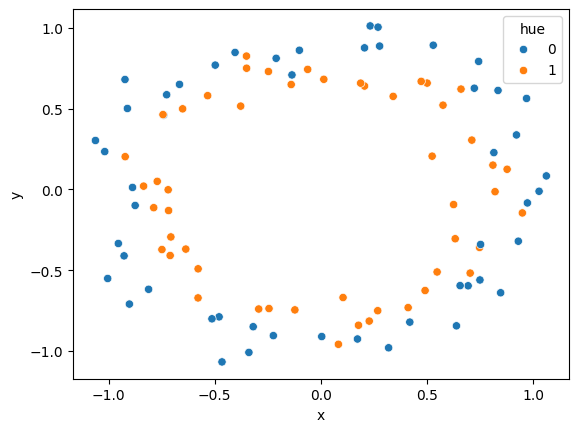

In [ ]:
# Put the data into a pandas DataFrame
df = pd.DataFrame({'x': X[:,0], 'y': X[:,1], 'hue': y})

# Plot the scatterplot using the DataFrame
sns.scatterplot(data=df, x='x', y='y', hue='hue')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
model = Sequential()

model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 3500,verbose=0)

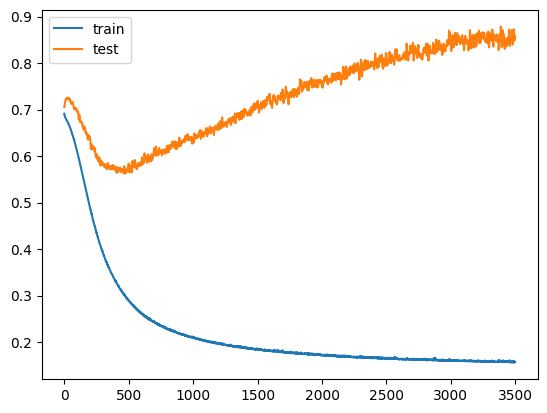

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


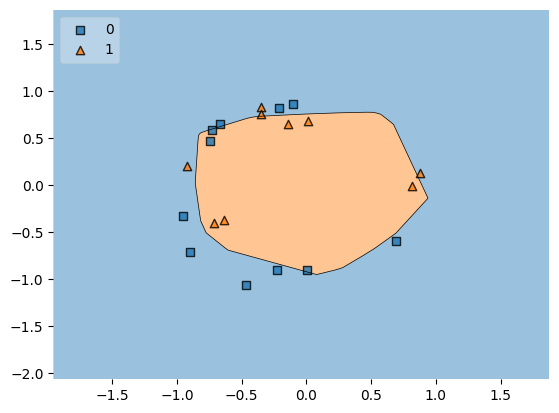

In [ ]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()

#**Early Stopping**

In [ ]:
model = Sequential()

model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.4328 - loss: 0.7053 - val_accuracy: 0.4500 - val_loss: 0.6936
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4664 - loss: 0.7013 - val_accuracy: 0.4500 - val_loss: 0.6947
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4680 - loss: 0.6943 - val_accuracy: 0.4500 - val_loss: 0.6968
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5180 - loss: 0.6927 - val_accuracy: 0.4500 - val_loss: 0.6976
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4898 - loss: 0.6937 - val_accuracy: 0.4500 - val_loss: 0.6991
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4664 - loss: 0.6958 - val_accuracy: 0.4500 - val_loss: 0.6989
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5102 - loss: 0.6899 - val_accuracy: 0.4500 - val_loss: 0.7002
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5102 - loss: 0.6897 - val_accuracy: 0.4000 - 

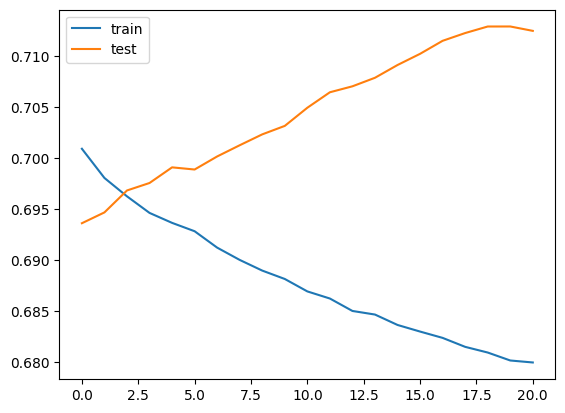

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()